# Fitting a Linear Regression Function

### Introduction

In this lesson we'll see how we can use our simple linear regression formula to write a predict method.  To do this, we need to know the linear regression model's coefficient and y-intercept.  We'll also need a list of data to predict on.  We'll write this method and encapsulate the related data using object orientation.

### How SciKit Learn "Fits"

First, let's review the functionality of Sci-Kit Learn.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

inputs = [800, 1500, 2000, 3500, 4000]
sklearn_inputs = [
     [800], 
    [1500], 
    [2000], 
    [3500], 
    [4000]
]

outcomes = [330, 780, 1130, 1310, 1780]
model.fit(sklearn_inputs, outcomes)
model.predict(sklearn_inputs)

array([ 462.66593527,  733.39275919,  926.76906199, 1506.89797038,
       1700.27427318])

As you can see, once sklearn fits the data, it can predict outcomes for the list of values that we pass through.  We still don't know how the a linear regression model `fits` the data.  But we have learned how the model can predict outcomes once it has arrived at the coefficient and y-intercept values.  Let's build out a class that creates instances who respond to the predict function.

### Creating our Hypothesis Class

In [6]:
class Hypothesis:
    pass

We create a class called Hypothesis which will be in charge of making our predictions.  The class should be initialized with values of `coef_` for the coefficient, `intercept_` for the `intercept`, and a set of `x_values` that it will make predictions on.  Hypothesis main seem like an odd name, but this class is in charge of predicting, and we can think of these predictions as making hypotheses about the outcomes.

In [ ]:
Hypothesis()

In [30]:
class Hypothesis():
    def __init__(self, coef_ = None, intercept_ = None, x_values = None):
        self.coef_ = coef_
        self.intercept_ = intercept_
        self.x_values = x_values
    
    def predict(self):
        return [self.predict_value(value) for value in self.x_values]
    
    def predict_value(self, value):
        return self.coef_*value + self.intercept_
    
    def trace(self, mode = 'lines', name=None, text = []):
        coef_text = f"y = {self.coef_}x"
        intercept_text = f" + {self.intercept_}"
        default_text = coef_text + intercept_text if self.intercept_ else coef_text
        text = name or default_text
        return {'x': self.x_values, 'y': self.predict(), 'mode': mode, 'name': name, 'text': text}

In [13]:
coef = 0.39
intercept = 153
hypothesis = Hypothesis(coef, intercept)

In [15]:
hypothesis.__dict__
# {'coef_': 0.39, 'intercept_': 153}

{'coef_': 0.39, 'intercept_': 153}

### Writing a predict method

Now let's add an instance method called `predict_value`.  The method takes an argument of an input value, and returns the output based on the parameters initialized in the model.

In [16]:
coef = 0.39
intercept = 153
hypothesis = Hypothesis(coef, intercept)
hypothesis.predict_value(100)
# 192.0

192.0

Now we don't want our Hypothesis class to predict just one value but a list of values.  Let's first change our Hypothesis class so that we can initialize an instance with a list of `inputs` and assigns the list to the attribute `x_values`.

In [23]:
coef = 0.39
intercept = 153
hypothesis = Hypothesis(coef, intercept)

inputs = [800, 1500, 2000, 3500, 4000]
hypothesis = Hypothesis(coef, intercept, inputs)

In [21]:
hypothesis.__dict__
# {'coef_': 0.39, 'intercept_': 153, 'x_values': [800, 1500, 2000, 3500, 4000]}

{'coef_': 0.39, 'intercept_': 153, 'x_values': [800, 1500, 2000, 3500, 4000]}

Ok great.  Now that our instance can accepts a list of inputs and assigns them to the attribute `x_values`, our next step is to write a method that makes predictions for each of these values.  Add a method called `predict()` that makes a prediction for each of our `x_values`.

In [24]:
hypothesis = Hypothesis(coef, intercept, inputs)
hypothesis.predict()
# [465.0, 738.0, 933.0, 1518.0, 1713.0]

[465.0, 738.0, 933.0, 1518.0, 1713.0]

Now let's go a little further than SciKit Learn.  Let's add the ability to build a trace of our hypothesis function.  Add the following method to our Hypothesis class.  

In [29]:
def trace(self, mode = 'lines', name=None, text = []):
        coef_text = f"y = {self.coef_}x"
        intercept_text = f" + {self.intercept_}"
        default_text = coef_text + intercept_text if self.intercept_ else coef_text
        text = name or default_text
        return {'x': self.x_values, 'y': self.predict(), 'mode': mode, 'name': name, 'text': text}

In [31]:
hypothesis = Hypothesis(coef, intercept, inputs)
hypothesis.predict()
hyp_trace = hypothesis.trace()
hyp_trace 
# {'x': [800, 1500, 2000, 3500, 4000],
#  'y': [465.0, 738.0, 933.0, 1518.0, 1713.0],
#  'mode': 'markers',
#  'name': None,
#  'text': 'y = 0.39x + 153'}

{'x': [800, 1500, 2000, 3500, 4000],
 'y': [465.0, 738.0, 933.0, 1518.0, 1713.0],
 'mode': 'lines',
 'name': None,
 'text': 'y = 0.39x + 153'}

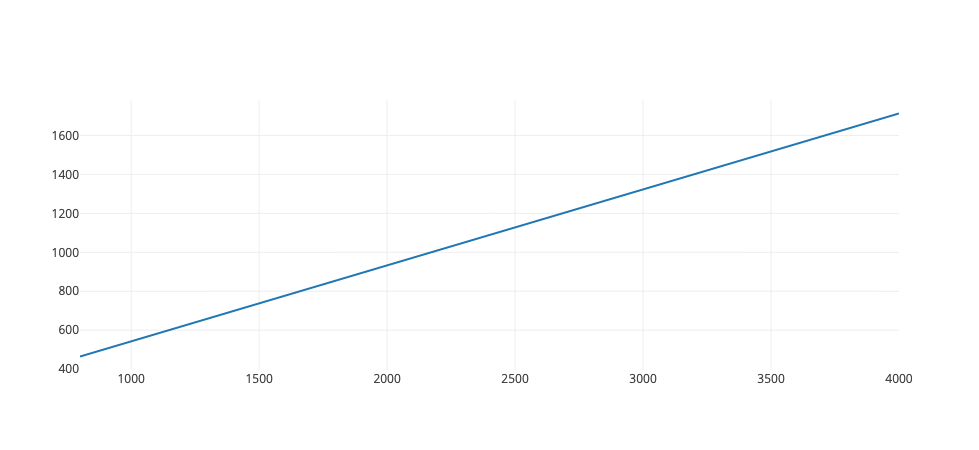

In [32]:
from graph import plot
plot([hyp_trace])

### Summary

In this lesson we saw how we can use our simple linear regression formula to write a predict method, and add it to Hypothesis instances.  To do this, we need to know the linear regression model's coefficient and y-intercept.  We also need a list of data to predict on.  